### Comparison of tree loss by RSPO-Certification

In [3]:
import os
import pandas as pd

# Get data from csv file which includes columns of tree loss and RSPO-certification.

cwd = os.getcwd()
up_level = os.path.dirname(cwd)
data_dir = up_level + '/data'

uniquemills_df = pd.read_csv(data_dir + '/uniquemills.csv')

In [4]:
# Create a column for treeloss_2019 as a proportion of forest as done before.

uniquemills_df['treeloss_2019_forest_proportion'] = uniquemills_df['treeloss_2019']/uniquemills_df['forest_area']

#### Create Boxplot

Text(0.5, 0, 'RSPO-Certification Status')

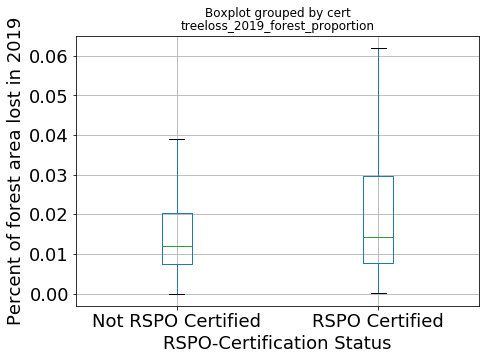

In [5]:
# Create a boxplot of forest area lost in 2019 by RSPO-certification.

ax = uniquemills_df.boxplot(column='treeloss_2019_forest_proportion', by='cert', showfliers=False, fontsize=18, figsize=(7,5))
ax.set_ylabel('Percent of forest area lost in 2019', fontsize=18)
ax.set_xlabel('RSPO-Certification Status', fontsize=18)


#### T-Test to Detect Statistically Significant Difference in Means

In [6]:
from scipy.stats import ttest_ind

# Create Pandas Series of Certified/Non-certified mills
certified_mills = uniquemills_df['treeloss_2019_forest_proportion'][uniquemills_df['cert']=='RSPO Certified']
not_certified_mills = uniquemills_df['treeloss_2019_forest_proportion'][uniquemills_df['cert']=='Not RSPO Certified']

# Drop NAs to run t-test
certified_mills = certified_mills.dropna()
not_certified_mills = not_certified_mills.dropna()

# Run t-test
stat, p = ttest_ind(certified_mills, not_certified_mills)
print('2019 treeloss in proportion to forest area:')
print('T-Stat=%.3f, p=%.3f \n' % (stat, p))


2019 treeloss in proportion to forest area:
T-Stat=2.413, p=0.016 



From the p-value returned, we can conclude that the 2019 tree loss of certified mills is statistically significantly greater than that of not certified mills.